<a href="https://colab.research.google.com/github/Jac-le/Cleaning-Data/blob/main/Copy_of_Sales_Territory_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Use Python to analyze sales data across different regions and territories.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


path = ('/content/drive/MyDrive/Datasets/south_african_sales.csv')

df = pd.read_csv(path)
df.head()

,Region,Territory,Salesperson,Sales_Amount_ZAR,Product_Category,Date_of_Sale,Customer_ID
0,Central Region,Free State,Marike Zulu,20336,Electronics,2024-04-01,e7a57d93
1,Central Region,KwaZulu-Natal,Mpho Nkosi,36991,Automotive,2024-10-23,3edf13e7
2,Central Region,KwaZulu-Natal,Nomsa Xaba,34243,Furniture,2024-10-04,4d1acbca
3,Southern Region,Northern Cape,Thando Coetzee,40393,Furniture,2024-11-20,b96da105
4,Central Region,KwaZulu-Natal,Lindiwe Botha,22158,Agricultural Equipment,2025-01-25,649a7471


In [ ]:
# Display basic info and summary statistics
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            100 non-null    object
 1   Territory         100 non-null    object
 2   Salesperson       100 non-null    object
 3   Sales_Amount_ZAR  100 non-null    int64 
 4   Product_Category  100 non-null    object
 5   Date_of_Sale      100 non-null    object
 6   Customer_ID       100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
Dataset Overview:
 None

Summary Statistics:
        Sales_Amount_ZAR
count         100.00000
mean        26433.22000
std         15053.14266
min          1723.00000
25%         12316.00000
50%         28228.50000
75%         39758.50000
max         49757.00000


In [ ]:
# Total sales by region


# Group by Region
grouped = df.groupby(['Region'])['Sales_Amount_ZAR'].sum().reset_index()
print(grouped)

grouped2 = df.groupby(['Territory'])['Sales_Amount_ZAR'].sum().reset_index()
print(grouped2)

            Region  Sales_Amount_ZAR
0   Central Region            901719
1  Northern Region            907584
2  Southern Region            834019
       Territory  Sales_Amount_ZAR
0   Eastern Cape            286043
1     Free State            307709
2        Gauteng            286503
3  KwaZulu-Natal            307507
4        Limpopo            252580
5     Mpumalanga            397549
6     North West            257455
7  Northern Cape            299594
8   Western Cape            248382


In [ ]:
# Total sales by territory
territory_sales = df.groupby('Territory')['Sales_Amount_ZAR'].sum().reset_index()
print(territory_sales)


       Territory  Sales_Amount_ZAR
0   Eastern Cape            286043
1     Free State            307709
2        Gauteng            286503
3  KwaZulu-Natal            307507
4        Limpopo            252580
5     Mpumalanga            397549
6     North West            257455
7  Northern Cape            299594
8   Western Cape            248382


<ipython-input-29-79d8c06df407>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Territory', y='Sales_Amount_ZAR', data=territory_sales, palette='viridis')


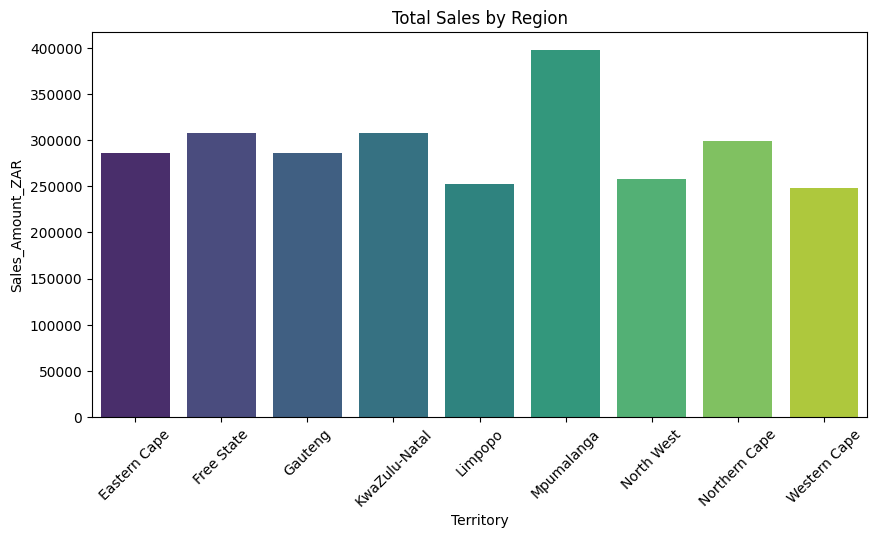

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Territory', y='Sales_Amount_ZAR', data=territory_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Territory')
plt.ylabel('Sales_Amount_ZAR')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-1a9b162a5758>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales_Amount_ZAR', data=grouped, palette='viridis')


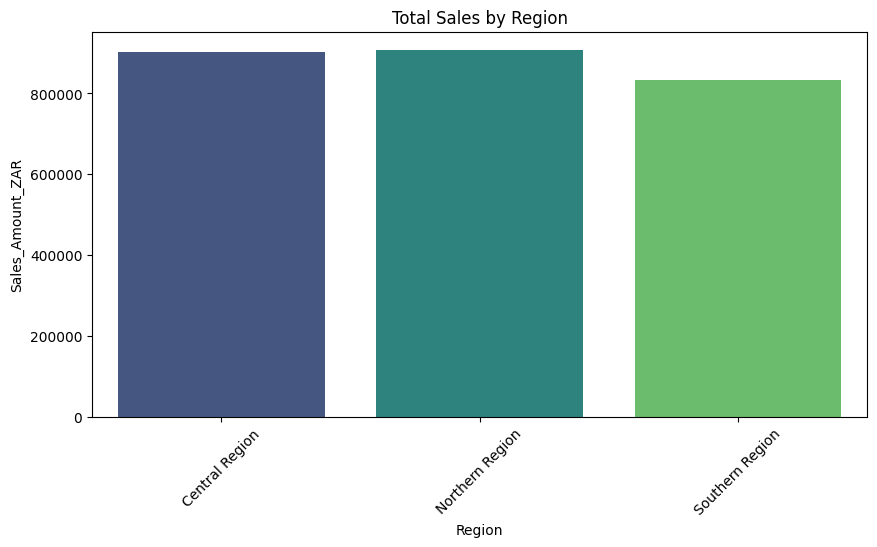

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Sales_Amount_ZAR', data=grouped, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales_Amount_ZAR')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Identify top-performing and low-performing territories
top_territories = territory_sales.nlargest(5, 'Sales_Amount_ZAR')
low_territories = territory_sales.nsmallest(5, 'Sales_Amount_ZAR')
print("\nTop 5 Performing Territories:\n", top_territories)
print("\nBottom 5 Performing Territories:\n", low_territories)


Top 5 Performing Territories:
        Territory  Sales_Amount_ZAR
5     Mpumalanga            397549
1     Free State            307709
3  KwaZulu-Natal            307507
7  Northern Cape            299594
2        Gauteng            286503

Bottom 5 Performing Territories:
       Territory  Sales_Amount_ZAR
8  Western Cape            248382
4       Limpopo            252580
6    North West            257455
0  Eastern Cape            286043
2       Gauteng            286503
